# Bajando datos de diferentes fuentes. Ejemplos

## Bajar datos de Bicimad

In [1]:
# Importamos librerias
import requests
import zipfile
import pandas as pd

In [7]:
# Ejemplo rapido de cómo funciona requests
url = "https://i.pinimg.com/originals/94/50/6d/94506d57bdcf8c24c8a4c1da4ab21278.jpg"
r = requests.get(url)

In [8]:
with open("beach.jpg", 'wb') as f:
   f.write(r.content)

In [8]:
# Obtenemos el zip de esta web
# https://opendata.emtmadrid.es/getattachment/037ee8a5-b824-43b1-ac7b-76225c783993/201810_Usage_Bicimad.aspx

filename = 'bicis.zip'
url = 'https://opendata.emtmadrid.es/getattachment/7517a650-ccdf-4ab1-b1b0-a1d13694472e/201906_Usage_Bicimad.aspx'

# Realizamos la peticion HTTP para bajarnos el zip.
r = requests.get(url, allow_redirects=True)

In [9]:
# Guardamos el zip
with open(filename, 'wb') as f:
   f.write(r.content)

In [10]:
# Extraemos lo que hay dentro
with zipfile.ZipFile(filename, 'r') as zip_ref:
    zip_ref.extractall(".")

In [11]:
# Leemos los datos
datos_bicis = pd.read_json('201906_Usage_Bicimad.json',  lines=True, encoding ='latin-1')

In [13]:
# Vemos qué pinta tienen
datos_bicis.head()

,_id,user_day_code,idplug_base,user_type,idunplug_base,travel_time,idunplug_station,ageRange,idplug_station,unplug_hourTime,zip_code,track
0,{'$oid': '5cf83b752f3843a016be4e2f'},e4d55deb9ac172a8d8f5f0a32599815bd51b7c8760d67e...,21,1,8,219,90,0,66,{'$date': '2019-06-01T00:00:00.000+0200'},,NaN
1,{'$oid': '5cf83b762f3843a016be4e48'},8a0c4123e924a50a958f51985eb71aea750fb072438035...,19,1,19,359,71,4,136,{'$date': '2019-06-01T00:00:00.000+0200'},28039,NaN
2,{'$oid': '5cf83b762f3843a016be4e4f'},a6a9c1f74a68496000542210abc4fc2eba79e2756ad535...,17,1,7,375,39,4,38,{'$date': '2019-06-01T00:00:00.000+0200'},28013,NaN
3,{'$oid': '5cf83b762f3843a016be4e53'},5706c0bd494acc02279d532821c9666b0e506d4f81c838...,4,1,21,264,66,5,90,{'$date': '2019-06-01T00:00:00.000+0200'},28009,NaN
4,{'$oid': '5cf83b762f3843a016be4e54'},eb1b6d32bd4add5d5ff91af72a38786d61075c090383a5...,3,1,13,367,152,4,166,{'$date': '2019-06-01T00:00:00.000+0200'},28006,NaN


## Importando datos desde la API de INE
A 06/09/2020 SERVICIO NO DISPONIBLE

Tempus3 es una base de datos relacional que utiliza un conjunto de objetos organizados dentro de una jerarquía para almacenar y gestinar la información estadística. Su elemento principal  es la serie temporal, único objeto con datos asociados, en torno a él surgen el resto de elementos. Operaciones y tablas estadísticas serán objetos contenedores de series temporales

In [4]:
# Importamos librerías
import requests
import pandas as pd
import datetime

In [5]:
# Documentación INE: https://www.ine.es/dyngs/DataLab/manual.html?cid=45
# Conociendo la API
url_plantilla = 'http://servicios.ine.es/wstempus/js/ES/DATOS_SERIE/{codigo}?nult={num_datos}'

# codigo de la serie de datos a consultar y numero de datos

codigo = ""
num_datos = 12

url = url_plantilla.format(codigo=codigo,
                           num_datos=num_datos)

In [6]:
# realizar la descarga de los datos usando la libreria request, y leyendo el formato json
respuesta = requests.get(url)
#datos = respuesta.json()

print(respuesta)

<Response [500]>


In [ ]:
# obtenemos el nombre de la serie para nombrar la columna en el data frame
nombre = datos['Nombre']

# Creamos una serie con las fechas, y las convertimos a zona horaria española y formateamos

fecha_serie_utc = pd.to_datetime([x['Fecha'] for x in datos['Data']], unit='ms', utc=True)

fecha_serie_madrid = fecha_serie_utc.tz_convert('Europe/Madrid')

fecha_serie = [x.tz_localize(None).date()
               for x in fecha_serie_madrid]


# creamos una lista con los valores de la serie que vienen en el tag 'Valor'

ocupados_serie = [x['Valor']
                  for x in datos['Data']] 

print(type(ocupados_serie))

In [ ]:
# contruimos un dataframe de pandas con los valores

import pandas as pd

tabla = pd.DataFrame(ocupados_serie,
                     index=fecha_serie,
                     columns=[nombre])

In [ ]:
tabla

,Total Nacional. Ambos sexos. 16 y más años. Ocupados. Personas.
2016-10-01,18508.1
2017-01-01,18438.3
2017-04-01,18813.3
2017-07-01,19049.2
2017-10-01,18998.4
2018-01-01,18874.2
2018-04-01,19344.1
2018-07-01,19528.0
2018-10-01,19564.6
2019-01-01,19471.1


# Acceso a archivos de la pagina de datos.gob.es
Uno de los mayores catálogos de información pública descargable en España

In [10]:
url = "https://data.renfe.com/dataset/928d911e-00ca-437b-be3f-068fc1f97800/resource/63d285e8-9f52-410b-8412-8a8c26f5ddb3/download/consumo-de-agua-y-materiales.csv"

datos=pd.read_csv(url, encoding='latin-1')
datos

,Año,Consumo de agua (m3),Aceites/grasas (kg),Pinturas (kg),Papel y cartón (kg),Arena (kg)
0,2018,917605,446983,116778,70013,41906
1,2017,923881,452534,96362,72002,42303
2,2016,952455,302202,125304,82004,41322
3,2015,941651,315302,130003,76890,40763
4,2014,1023534,319674,125448,87286,41647
5,2013,905703,308904,96946,74286,41440


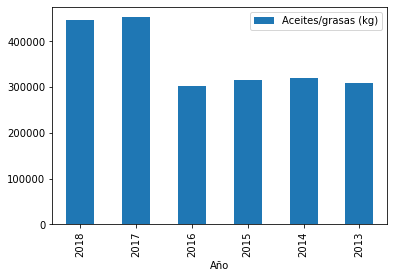

In [11]:
datos.plot.bar("Año", "Aceites/grasas (kg)")

# OpenStreetMap

In [12]:
import requests
import json
import pandas as pd
overpass_url = "http://overpass-api.de/api/interpreter"
overpass_query = """
[out:json];
node["amenity"="restaurant"]
  (40.420801, -3.694702,40.423754, -3.688167); 
out;
"""
response = requests.get(overpass_url, 
                        params={'data': overpass_query})
print(response)
data = response.json()

<Response [200]>


In [13]:
data

{'version': 0.6,
 'generator': 'Overpass API 0.7.56.7 b85c4387',
 'osm3s': {'timestamp_osm_base': '2020-10-13T09:09:02Z',
  'copyright': 'The data included in this document is from www.openstreetmap.org. The data is made available under ODbL.'},
 'elements': [{'type': 'node',
   'id': 305536401,
   'lat': 40.4230858,
   'lon': -3.6935468,
   'tags': {'amenity': 'restaurant', 'name': 'La Castafiore'}},
  {'type': 'node',
   'id': 324580483,
   'lat': 40.4226068,
   'lon': -3.6932565,
   'tags': {'amenity': 'restaurant',
    'cuisine': 'japanese',
    'name': 'Sake Dining Himawari'}},
  {'type': 'node',
   'id': 3361315181,
   'lat': 40.4233148,
   'lon': -3.6925055,
   'tags': {'addr:city': 'Madrid',
    'addr:housenumber': '12',
    'addr:postcode': '28004',
    'addr:street': 'Calle de Doña Bárbara de Braganza',
    'addr:subdistrict': 'Justicia',
    'amenity': 'restaurant',
    'cuisine': 'regional',
    'name': 'Ainhoa',
    'phone': '+34 913 08 27 26',
    'website': 'http://resta

In [21]:
elements = data['elements']
places = {'lat': [], 'lon': [], 'name': [], 'address': []}
for i in elements:
    try:
        latitude = i['lat']
        longitude = i['lon']
        name = i['tags']['name']
        street = i['tags']['addr:street']
        number = i['tags']['addr:housenumber']
        
        
        places['lat'].append(latitude)
        places['lon'].append(longitude)
        places['name'].append(name)
        places['address'].append(street + ' ' + str(number))
        
    except:
        continue


df = pd.DataFrame(places)
df

,lat,lon,name,address
0,40.423315,-3.692506,Ainhoa,Calle de Doña Bárbara de Braganza 12
1,40.421956,-3.693905,En La Gloria,Calle de Prim 9
2,40.421951,-3.693535,Tampu,Calle de Prim 13
3,40.422266,-3.694097,Casa Gades,Calle del Conde de Xiquena 4
4,40.423345,-3.692632,El Gato Persa,Calle de Doña Bárbara de Braganza 10
5,40.422441,-3.694220,Cannibal Raw Bar,Calle del Almirante 12
6,40.423600,-3.693725,Luke,Calle de Doña Bárbara de Braganza 2
7,40.422141,-3.690864,Thai Garden 2112,Calle de Recoletos 4
8,40.422379,-3.689518,Flavia,Calle de Gil de Santivañes 2
9,40.422777,-3.689781,SQD Meat Point,Calle de Villanueva 2


## Web scrapping de IMDB

In [23]:
soup.select('td.titleColumn')[0].get_text()

NameError: name 'soup' is not defined

In [57]:
soup.select('td.titleColumn a')[0]

<a href="/title/tt0111161/" title="Frank Darabont (dir.), Tim Robbins, Morgan Freeman">Cadena perpetua</a>

In [45]:
soup.select('td.titleColumn a')[0].attrs.get('title')

'Frank Darabont (dir.), Tim Robbins, Morgan Freeman'

In [65]:
soup.select('td.ratingColumn strong')[0].get_text()

'9.2'

In [14]:
from bs4 import BeautifulSoup
import requests
import re
import pandas as pd

# Download IMDB's Top 250 data
url = 'http://www.imdb.com/chart/top'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

movies = soup.select('td.titleColumn')
links = [a.attrs.get('href') for a in soup.select('td.titleColumn a')]
crew = [a.attrs.get('title') for a in soup.select('td.titleColumn a')]
ratings = [b.attrs.get('data-value') for b in soup.select('td.posterColumn span[name=ir]')]
votes = [b.attrs.get('data-value') for b in soup.select('td.ratingColumn strong')]

imdb = []

# Store each item into dictionary (data), then put those into a list (imdb)
for index in range(0, len(movies)):
    # Seperate movie into: 'place', 'title', 'year'
    movie_string = movies[index].get_text()
    movie = (' '.join(movie_string.split()).replace('.', ''))
    movie_title = movie[len(str(index))+1:-7]
    year = re.search('\((.*?)\)', movie_string).group(1)
    place = movie[:len(str(index))-(len(movie))]
    data = {"movie_title": movie_title,
            "year": year,
            "place": place,
            "star_cast": crew[index],
            "rating": ratings[index],
            "vote": votes[index],
            "link": links[index]}
    imdb.append(data)
df = pd.DataFrame(imdb)
df


#for item in imdb:
#    print(item['place'], '-', item['movie_title'], '('+item['year']+') -', 'Starring:', item['star_cast'])

,movie_title,year,place,star_cast,rating,vote,link
0,Cadena perpetua,1994,1,"Frank Darabont (dir.), Tim Robbins, Morgan Fre...",9.222784694063787,None,/title/tt0111161/
1,El padrino,1972,2,"Francis Ford Coppola (dir.), Marlon Brando, Al...",9.148822280951551,None,/title/tt0068646/
2,El padrino: Parte II,1974,3,"Francis Ford Coppola (dir.), Al Pacino, Robert...",8.981089741690383,None,/title/tt0071562/
3,El caballero oscuro,2008,4,"Christopher Nolan (dir.), Christian Bale, Heat...",8.973489985697055,None,/title/tt0468569/
4,12 hombres sin piedad,1957,5,"Sidney Lumet (dir.), Henry Fonda, Lee J. Cobb",8.930610597199692,None,/title/tt0050083/
...,...,...,...,...,...,...,...
245,Terminator,1984,246,"James Cameron (dir.), Arnold Schwarzenegger, L...",8.009025588107761,None,/title/tt0088247/
246,Mandarinas,2013,247,"Zaza Urushadze (dir.), Lembit Ulfsak, Elmo Nüg...",8.008114051381694,None,/title/tt2991224/
247,A Silent Voice,2016,248,"Naoko Yamada (dir.), Miyu Irino, Saori Hayami",8.008034087745433,None,/title/tt5323662/
248,Fanny y Alexander,1982,249,"Ingmar Bergman (dir.), Bertil Guve, Pernilla A...",8.007547063384985,None,/title/tt0083922/


## Acediendo a datos de twitter
Para esta demo utilizaremos el paquete [tweepy](https://www.tweepy.org/) para atacar datos de Twitter desde Python.

Necesitamos registrarnos en la [web de desarrolladores](https://developer.twitter.com/en/apply-for-access) para obtener unas credenciales.

In [27]:
# Primero hay que instalar el paquete de Twitter: tweep
# !pip install tweepy

  Using cached tweepy-3.9.0-py2.py3-none-any.whl (30 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)


In [15]:
import tweepy  
import time
import csv

# Credenciales de la web de desarroladores
access_token = "3173812961-1BCalQw3RtSA5cHMcUG5IRdHlL2hYpzvsE8Sa7X"  
access_token_secret = "gXwPB0GAQ5byFB9xqUgPTmqqy9cPTo5cOHUvoAXffDro2"  
consumer_key = "xMY2NgKiWQbvsHvRmrzC4Uued"  
consumer_secret = "PajZVgxIkRPP512DDgTHzq3LTnERBwKy3VMqmhpzRExxpiKMPg"  

# Nos autenticamos en la API
try:
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  
    auth.set_access_token(access_token, access_token_secret)  
    api = tweepy.API(auth,wait_on_rate_limit=True)
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [16]:
csvFile = open('tweet_covid19.csv', 'a')

#Use csv Writer
csvWriter = csv.writer(csvFile)

for tweet in tweepy.Cursor(api.search,q="#COVID19",count=50,
                           lang="es",
                           since="2020-09-05").items(50):
    print (tweet.created_at, tweet.text)
    csvWriter.writerow([tweet.created_at, tweet.text.encode('utf-8')])

2020-10-13 09:12:20 RT @PabloFuente: #COVID19 Un español que vive en Suecia me escribe para decirme que no muestro vídeos de que allí la gente hace vida normal…
2020-10-13 09:12:18 RT @ramonlobo: Es difícil creer que el partido que hizo —y hace— todo tipo de trampas en decenas de casos de corrupción en Madrid no esté m…
2020-10-13 09:12:15 RT @josemanuelcaro7: @tu_abandono @PODEMOS En honor a la #Verdad  @PODEMOS,  desde que es #Gobierno  ,es el grupo parlamentario que PEOR  t…
2020-10-13 09:12:14 RT @descoladoen: ¿Comó protegernos? Varias capaz son necesarias
by @MackayIM 
#COVID19 https://t.co/ZMOC5Hda8L https://t.co/JVZa5KYBiY
2020-10-13 09:12:05 La farmacia comunitaria es clave en la detección precoz del #Covid19 💪💚 https://t.co/pD6EDjU3UK
2020-10-13 09:12:04 RT @PrisionesEstado: Para quitar #EstadoDeAlarma Madrid es muy sencillo, que @IdiazAyuso pase a llamarse Gabilondo. 

Así de fácil, veréis…
2020-10-13 09:12:04 RT @Aytoburgos: La #COVID19 ha agravado las dificultades para niña

## Bajando datos de la calidad del aire

También existe un dataset en Kaggle, pero vamos a ver un ejemplo

In [30]:
import pandas as pd
import requests
import io
import csv

url2 = "http://www.mambiente.munimadrid.es/opendata/horario.txt"

datos=pd.read_csv(url2, header=None)#.content


In [31]:
datos

,0,1,2,3,4,5,6,7,8,9,...,47,48,49,50,51,52,53,54,55,56
0,28,79,4,1,38,2,2020,9,26,9.0,...,0,N,0,N,0,N,0,N,0,N
1,28,79,4,6,48,2,2020,9,26,0.1,...,0,N,0,N,0,N,0,N,0,N
2,28,79,4,7,8,2,2020,9,26,1.0,...,0,N,0,N,0,N,0,N,0,N
3,28,79,4,8,8,2,2020,9,26,12.0,...,0,N,0,N,0,N,0,N,0,N
4,28,79,4,12,8,2,2020,9,26,13.0,...,0,N,0,N,0,N,0,N,0,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149,28,79,60,7,8,2,2020,9,26,1.0,...,0,N,0,N,0,N,0,N,0,N
150,28,79,60,8,8,2,2020,9,26,12.0,...,0,N,0,N,0,N,0,N,0,N
151,28,79,60,10,47,2,2020,9,26,6.0,...,0,N,0,N,0,N,0,N,0,N
152,28,79,60,12,8,2,2020,9,26,14.0,...,0,N,0,N,0,N,0,N,0,N
